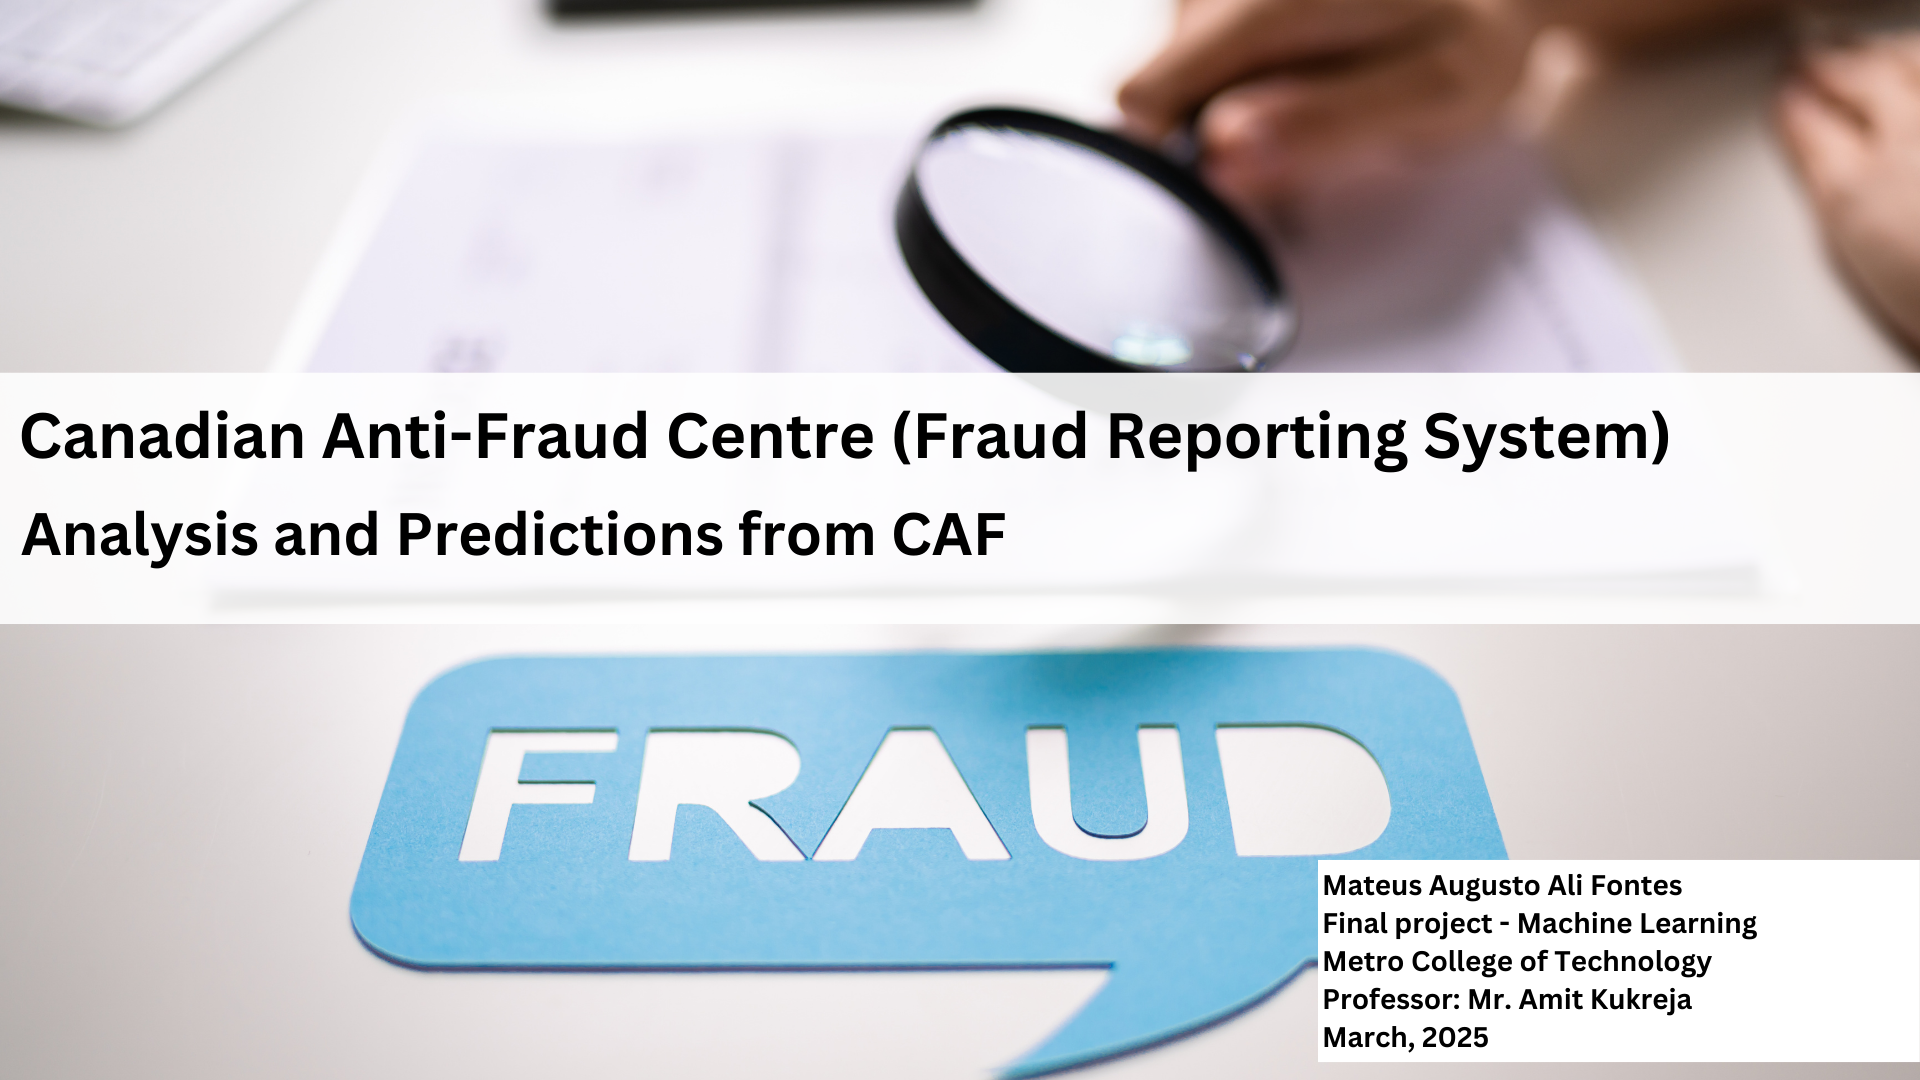

### Dataset description

The Canadian Anti-Fraud Centre's fraud and identity crime reports are contained within their Fraud Reporting System database. The data is acquired from total public reports, online reports are created by the public entering information to populate their individual reports. The accuracy of a fraud report is largely dependent on the individual submitting the information. Individuals submitting reports can choose to include as much or as little information as they deem necessary. Nonetheless, the Canadian Anti-Fraud Centre intake analysts review all submitted reports to determine accuracy of submitted information.

https://open.canada.ca/data/en/dataset/6a09c998-cddb-4a22-beff-4dca67ab892f

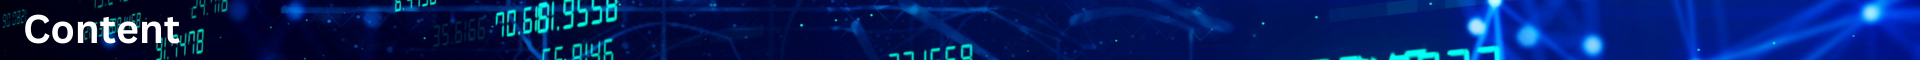

1.	Import the dataset: Load the data into your analysis environment.
2.	Display records: Show the first 5 and last 5 records of the dataset.
3.	Identify data types: Check and note the data types for each variable.
4.	Missing entries: Determine the number of missing entries per variable.
5.	Duplicate records: Identify and count any duplicate records.
6.	Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.
7.	Outlier detection: Use the Local Outlier Factor 
8.	Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:
    -	Chi-square test to assess independence between two categorical variables.
    -	Correlation analysis to examine relationships between two numeric variables.
9.	Check for presence of collinearity and multi-collinearity and address it appropriately.
10.	Encode the data if required (if there are categorical independent variables).
11.	Split the dataset into training and testing subsets.
12.	Scale the training data and use the same scaler to also scale the test data. (use scaled data for algorithms requiring scaling)
13.	Perform PCA. Based on outcome, recommend if Principal Components would be useful for data preparation or not. 
14.	Classification: Build models based on atleast 3 different algorithms
    - i.	Logistic Regression / DecisionTreeClassifier 
    - ii.	RandomForest, XGBoost: For models other than KNN, tune atleast 3 hyperparameters using GridSearchCV.
15.	Check for overfitting and take steps to address it


# Data Modeling: 
The problem can be identified as Binary Classification (when the person be come a real Victim or just was Attempt).

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. I performed a **train-test split** in the data set (80-20) and will build different machine learning Classification models.


Since we have an imbalanced dataset, accuracy can give us false assumptions regarding the classifier’s performance, it’s better to rely on precision and recall, in the same way, a **Precision-Recall curve** is better to calibrate the probability threshold in an imbalanced class scenario as a ROC curve. Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure. In this project, I will select the best model based on **F-score**.


**Classic** machine learning  classifiers                                
- 1. **Logistic Regression**                                       
- 2. **Decision Tree**
**Ensembles** machine learning  classifiers

                                  
- 1. **Random Forest**                                                         
- 2. **Extreme Gradient Boosting (XGBoost)**       


I will apply **Hyperparameter Tuning** based on F-score with **Grid Search** and **Cross-Validation**, then based on **F1_score** I will select the best **3 models** and try to make their performance better by Adding some more **new features** by clustering(using **Kmeans**) and **PCA**.


In [1143]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import pylab as pl

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Stats and machine learning libraries
#import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import label_binarize
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Metrics and statistical analysis
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,
    classification_report, f1_score, mean_absolute_error, r2_score, mean_squared_error 
)
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

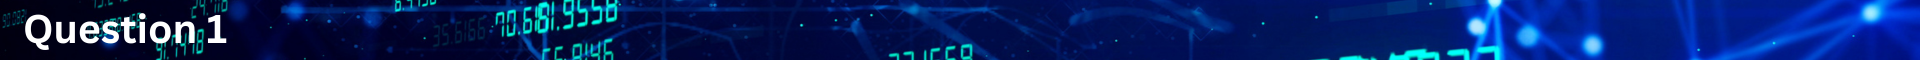
##### 1.	Import the dataset: Load the data into your analysis environment.

In [1155]:
caf = pd.read_csv("Canadian Anti-Fraud Centre Reporting Data-2021-2024.csv",encoding='latin1')
caf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313976 entries, 0 to 313975
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count   Dtype 
---  ------                                                       --------------   ----- 
 0   Numéro d'identification / Number ID                          313976 non-null  int64 
 1   Date Received / Date reçue                                   313976 non-null  object
 2   Complaint Received Type                                      313976 non-null  object
 3   Type de plainte reçue                                        313976 non-null  object
 4   Country                                                      313976 non-null  object
 5   Pays                                                         313976 non-null  object
 6   Province/State                                               313976 non-null  object
 7   Province/État                                                313976 non-nu

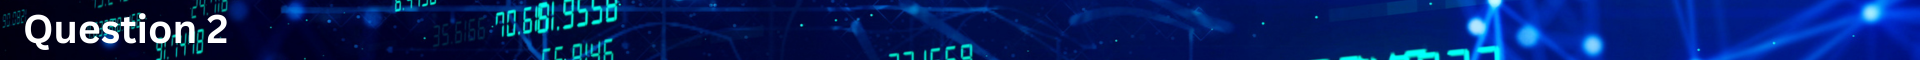
##### 2.	Display records: Show the first 5 and last 5 records of the dataset.

In [1157]:
caf.head(5)

Numéro d'identification / Number ID Date Received / Date reçue  \
0                                    1                 2021-01-02   
1                                    2                 2021-01-02   
2                                    3                 2021-01-02   
3                                    4                 2021-01-02   
4                                    5                 2021-01-02   

  Complaint Received Type Type de plainte reçue        Country          Pays  \
0            CAFC Website         CAFC site web         Canada        Canada   
1            CAFC Website         CAFC site web         Canada        Canada   
2            CAFC Website         CAFC site web  Not Specified  Non spécifié   
3            CAFC Website         CAFC site web  United States    États-Unis   
4            CAFC Website         CAFC site web         Canada        Canada   

     Province/State        Province/État  \
0       Nova Scotia      Nouvelle-Écosse   
1  British Columbia  Colombie-Britanique   
2     Not Specified         Non spécifié   
3        California           Californie   
4           Ontario              Ontario   

  Fraud and Cybercrime Thematic Categories  \
0                                 Phishing   
1                           Identity Fraud   
2                                  Romance   
3                      Foreign Money Offer   
4                              Merchandise   

  Catégories thématiques sur la fraude et la cybercriminalité  ...  \
0                                        Hameçonnage           ...   
1                                Fraude à l'identité           ...   
2                                            Romance           ...   
3                       Offre dargent de létranger           ...   
4                                        Marchandise           ...   

  Méthode de sollicitation         Gender           Genre  \
0           Messages texte         Female           Femme   
1            Autre/inconnu         Female           Femme   
2            Autre/inconnu  Not Available  non disponible   
3                 Courrier           Male           Homme   
4                 Internet         Female           Femme   

  Language of Correspondence Langue de correspondance  \
0                    English                  Anglais   
1                    English                  Anglais   
2              Not Available           non disponible   
3                    English                  Anglais   
4                    English                  Anglais   

  Victim Age Range / Tranche d'âge des victimes Complaint Type  \
0                                      '30 - 39        Attempt   
1                                      '70 - 79         Victim   
2               'Not Available / non disponible         Victim   
3                                      '60 - 69        Attempt   
4                                      '20 - 29         Victim   

  Type de plainte Number of Victims / Nombre de victimes  \
0       Tentative                                      0   
1         Victime                                      1   
2         Victime                                      1   
3       Tentative                                      0   
4         Victime                                      1   

   Dollar Loss /pertes financières  
0                            $0.00  
1                            $0.00  
2                          $298.00  
3                            $0.00  
4                           $50.00  

[5 rows x 21 columns]

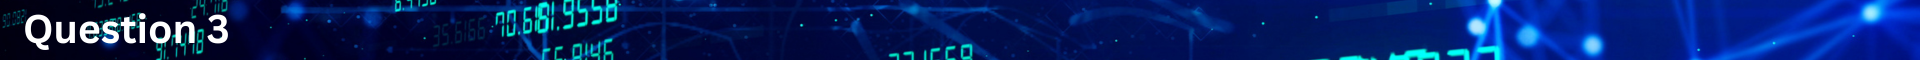
##### 3.	Identify data types: Check and note the data types for each variable

In [1159]:
caf.dtypes

Numéro d'identification / Number ID                             int64
Date Received / Date reçue                                     object
Complaint Received Type                                        object
Type de plainte reçue                                          object
Country                                                        object
Pays                                                           object
Province/State                                                 object
Province/État                                                  object
Fraud and Cybercrime Thematic Categories                       object
Catégories thématiques sur la fraude et la cybercriminalité    object
Solicitation Method                                            object
Méthode de sollicitation                                       object
Gender                                                         object
Genre                                                          object
Language of Correspo

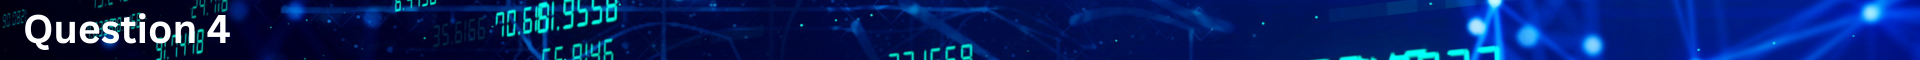
##### 4.	Missing entries: Determine the number of missing entries per variable.

In [1167]:
caf.isna().sum()

Numéro d'identification / Number ID                            0
Date Received / Date reçue                                     0
Complaint Received Type                                        0
Type de plainte reçue                                          0
Country                                                        0
Pays                                                           0
Province/State                                                 0
Province/État                                                  0
Fraud and Cybercrime Thematic Categories                       0
Catégories thématiques sur la fraude et la cybercriminalité    0
Solicitation Method                                            0
Méthode de sollicitation                                       0
Gender                                                         0
Genre                                                          0
Language of Correspondence                                     0
Langue de correspondance 

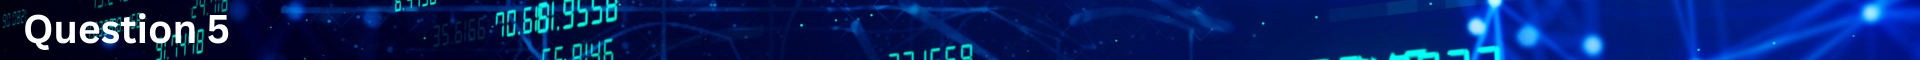
##### 5.	Duplicate records: Identify and count any duplicate records.

In [1165]:
caf.duplicated().sum()

0

### Cleaning dataset

In [1171]:
caf.columns

Index(['Numéro d'identification / Number ID', 'Date Received / Date reçue',
       'Complaint Received Type', 'Type de plainte reçue', 'Country', 'Pays',
       'Province/State', 'Province/État',
       'Fraud and Cybercrime Thematic Categories',
       'Catégories thématiques sur la fraude et la cybercriminalité',
       'Solicitation Method', 'Méthode de sollicitation', 'Gender', 'Genre',
       'Language of Correspondence', 'Langue de correspondance',
       'Victim Age Range / Tranche d'âge des victimes', 'Complaint Type',
       'Type de plainte', 'Number of Victims / Nombre de victimes',
       'Dollar Loss /pertes financières'],
      dtype='object')

In [1173]:
#Drop duplicate columns (French version)
caf.drop(columns=["Numéro d'identification / Number ID",'Type de plainte reçue','Pays','Province/État','Catégories thématiques sur la fraude et la cybercriminalité',
                   'Méthode de sollicitation','Genre','Langue de correspondance','Type de plainte'],inplace=True)

In [1175]:
caf.columns

Index(['Date Received / Date reçue', 'Complaint Received Type', 'Country',
       'Province/State', 'Fraud and Cybercrime Thematic Categories',
       'Solicitation Method', 'Gender', 'Language of Correspondence',
       'Victim Age Range / Tranche d'âge des victimes', 'Complaint Type',
       'Number of Victims / Nombre de victimes',
       'Dollar Loss /pertes financières'],
      dtype='object')

In [1177]:
#Rename columns
caf.rename(columns={'Date Received / Date reçue':'Data Received','Language of Correspondence':'Language',
                   "Victim Age Range / Tranche d'âge des victimes":"Age Range",'Fraud and Cybercrime Thematic Categories':"Fraud and Cybercrime Thematic",
                   "Number of Victims / Nombre de victimes":"Number of Victims","Dollar Loss /pertes financières":"Dollar Loss"},inplace=True)
caf.columns

Index(['Data Received', 'Complaint Received Type', 'Country', 'Province/State',
       'Fraud and Cybercrime Thematic', 'Solicitation Method', 'Gender',
       'Language', 'Age Range', 'Complaint Type', 'Number of Victims',
       'Dollar Loss'],
      dtype='object')

In [1179]:
caf.head()

Data Received Complaint Received Type        Country    Province/State  \
0    2021-01-02            CAFC Website         Canada       Nova Scotia   
1    2021-01-02            CAFC Website         Canada  British Columbia   
2    2021-01-02            CAFC Website  Not Specified     Not Specified   
3    2021-01-02            CAFC Website  United States        California   
4    2021-01-02            CAFC Website         Canada           Ontario   

  Fraud and Cybercrime Thematic Solicitation Method         Gender  \
0                      Phishing        Text message         Female   
1                Identity Fraud       Other/unknown         Female   
2                       Romance       Other/unknown  Not Available   
3           Foreign Money Offer                Mail           Male   
4                   Merchandise            Internet         Female   

        Language                        Age Range Complaint Type  \
0        English                         '30 - 39        Attempt   
1        English                         '70 - 79         Victim   
2  Not Available  'Not Available / non disponible         Victim   
3        English                         '60 - 69        Attempt   
4        English                         '20 - 29         Victim   

   Number of Victims Dollar Loss  
0                  0       $0.00  
1                  1       $0.00  
2                  1     $298.00  
3                  0       $0.00  
4                  1      $50.00

In [1183]:
#Format Data
caf['Data Received'] = pd.to_datetime(caf['Data Received'])

In [1185]:
caf['Country'].value_counts()

Country
Canada                   238635
Not Specified             71122
United States              1929
India                       234
United Kingdom              150
                          ...  
Antigua and Barbuda           1
Guam                          1
Saint Kitts and Nevis         1
Isle of Man                   1
Lithuania                     1
Name: count, Length: 155, dtype: int64

#### Segmentation column: Country

In [1187]:
caf['Country'] = caf['Country'].apply(lambda x : x if x == 'Canada' else np.nan if x == 'Not Specified' else 'Other')

In [1189]:
caf['Country'].value_counts()

Country
Canada    238635
Other       4219
Name: count, dtype: int64

In [1191]:
#Calculate percentage of each gender to fill missing values
totalcountry = caf['Country'].value_counts().sum()
canada_perc = caf['Country'].value_counts().loc['Canada'] / totalcountry
others_perc = caf['Country'].value_counts().loc['Other'] / totalcountry
print("Canada % before fill missing values: ",canada_perc)
print("Other % before fill missing values: ",others_perc)
print("Total observations before fill missing values: ", totalcountry) 
print("Missing values: ", caf['Country'].isna().sum())

#Fill values by using the next valid observation to fill the gap.
caf['Country'] = caf['Country'].bfill()
print("-"*100)

#After filled missing values
totalcountry = caf['Country'].value_counts().sum()
canada_perc = caf['Country'].value_counts().loc['Canada'] / totalcountry
others_perc = caf['Country'].value_counts().loc['Other'] / totalcountry
print("Canada % after fill missing values: ",canada_perc)
print("Other % after fill missing values: ",others_perc)
print("Total observations after fill missing values: ", totalcountry) 
print("Missing values: ", caf['Country'].isna().sum())

Canada % before fill missing values:  0.982627422237229
Other % before fill missing values:  0.017372577762771048
Total observations before fill missing values:  242854
Missing values:  71122
----------------------------------------------------------------------------------------------------
Canada % after fill missing values:  0.9825368817998827
Other % after fill missing values:  0.017463118200117207
Total observations after fill missing values:  313976
Missing values:  0


#### Filtering dataset (Only reports from Canada / 2024)

In [1193]:
canada_provinces = ['Nova Scotia', 'British Columbia','Ontario', 'Quebec', 'Alberta', 
                    'Saskatchewan', 'Manitoba', 'Yukon','Newfoundland And Labrador',
                    'Prince Edward Island', 'New Brunswick','North West Territories','Nunavut','Not Specified']

In [1195]:
caf_2024 = caf[(caf['Data Received']>='2024-01-01') & (caf['Province/State'].isin(canada_provinces))].copy()
caf_2024 = caf_2024.rename(columns={'Province/State':'Province'})
caf_2024.head()

Data Received Complaint Received Type Country       Province  \
264682    2024-01-01            CAFC Website  Canada  Not Specified   
264683    2024-01-01            CAFC Website  Canada  Not Specified   
264684    2024-01-01            CAFC Website  Canada  Not Specified   
264685    2024-01-01            CAFC Website  Canada        Ontario   
264686    2024-01-01            CAFC Website  Canada        Ontario   

       Fraud and Cybercrime Thematic Solicitation Method         Gender  \
264682                Spear Phishing               Email  Not Available   
264683                Identity Fraud       Other/unknown  Not Available   
264684                      Phishing        Text message  Not Available   
264685                   Investments            Internet  Not Available   
264686                      Phishing        Text message           Male   

             Language                        Age Range Complaint Type  \
264682  Not Available  'Not Available / non disponible        Attempt   
264683  Not Available  'Not Available / non disponible        Attempt   
264684  Not Available  'Not Available / non disponible        Attempt   
264685        English  'Not Available / non disponible         Victim   
264686        English                         '30 - 39        Attempt   

        Number of Victims Dollar Loss  
264682                  0       $0.00  
264683                  0       $0.00  
264684                  0       $0.00  
264685                  1  $60,000.00  
264686                  0       $0.00

In [1197]:
caf_2024.groupby(by='Province').size().sort_values(ascending=False)

Province
Ontario                      15373
Quebec                       10176
Not Specified                 9557
British Columbia              5055
Alberta                       4061
Manitoba                      1681
Saskatchewan                   989
Nova Scotia                    806
New Brunswick                  711
Newfoundland And Labrador      303
Prince Edward Island           121
Yukon                           53
North West Territories          40
Nunavut                         10
dtype: int64

In [1199]:
caf_2024['Province'] = caf_2024['Province'].apply(lambda x : np.nan if x == 'Not Specified' else x)
caf_2024['Province'] = caf_2024['Province'].bfill()
caf_2024.groupby(by='Province').size().sort_values(ascending=False)

Province
Ontario                      19255
Quebec                       12122
British Columbia              6561
Alberta                       5140
Manitoba                      2073
Saskatchewan                  1214
Nova Scotia                   1019
New Brunswick                  884
Newfoundland And Labrador      377
Prince Edward Island           161
Yukon                           66
North West Territories          53
Nunavut                         11
dtype: int64

#####  Formating values in column "Dollar loss" 

In [1201]:

caf_2024['Dollar Loss'] = pd.to_numeric(caf_2024['Dollar Loss'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
caf_2024['Dollar Loss'].dtype

dtype('float64')

In [1203]:
#Create a column Month, extrating month from full data in column "Data Received"
caf_2024['Month'] = caf_2024['Data Received'].dt.month
caf_2024.drop(columns='Data Received', inplace=True)

In [564]:
# usa_state = ['California','Virginia', 'Washington', 'Alaska',
#        'Wisconsin', 'Utah','Florida', 'Colorado', 'New Jersey', 'Texas', 'Nevada', 'Missouri',
#        'Connecticut', 'New York', 'New Hampshire', 'Illinois',
#        'Pennsylvania', 'New Mexico', 'Alabama', 'Kentucky', 'Minnesota',
#        'Maryland', 'Oregon', 'Tennessee', 'North Carolina', 'Oklahoma',
#        'Ohio', 'Massachusetts', 'Maine', 'Wyoming', 'Iowa', 'Arizona',
#        'Indiana', 'Kansas', 'Georgia', 'Michigan', 'Louisiana',
#        'South Carolina', 'Mississippi', 'District Of Columbia', 'Vermont',
#        'Hawaii', 'Montana', 'South Dakota', 'West Virginia',
#        'Rhode Island', 'Arkansas', 'Idaho', 'Delaware', 'Nebraska',
#        'North Dakota', 'Puerto Rico']
# caf_2024['Province/State'] = caf_2024['Province/State'].apply(lambda x : 'USA' if x in usa_state else x)
# caf_2024['Province/State'].unique()

In [1205]:
#Checking missing values
caf_2024.isnull().sum()

Complaint Received Type          0
Country                          0
Province                         0
Fraud and Cybercrime Thematic    0
Solicitation Method              0
Gender                           0
Language                         0
Age Range                        0
Complaint Type                   0
Number of Victims                0
Dollar Loss                      0
Month                            0
dtype: int64

In [1207]:
#Checking duplicate rows
caf_2024.duplicated().sum()

12395

In [1209]:
caf_2024 = caf_2024.drop_duplicates()

In [1211]:
caf_2024.duplicated().sum()

0

In [1213]:
#Checking classes in eache feature from dataset
for col in caf_2024.columns:
    print(caf_2024[col].value_counts())
    print("_"*50)

Complaint Received Type
CAFC Website    16582
Phone           15656
Email            3196
NCFRS             946
Other             114
Mail               20
Unknown            19
In Person           7
Message             1
Name: count, dtype: int64
__________________________________________________
Country
Canada    35962
Other       579
Name: count, dtype: int64
__________________________________________________
Province
Ontario                      13693
Quebec                        7785
British Columbia              5310
Alberta                       4255
Manitoba                      1919
Saskatchewan                  1145
Nova Scotia                    939
New Brunswick                  838
Newfoundland And Labrador      371
Prince Edward Island           156
Yukon                           66
North West Territories          53
Nunavut                         11
Name: count, dtype: int64
__________________________________________________
Fraud and Cybercrime Thematic
Service      

In [575]:
# for col in caf_2024.columns:
#     print(caf_2024[col].unique())
#     print("_"*50)

### Segmentation for all columns

In [1215]:
#Segmentation column "Complaint Received Type"
caf_2024['Complaint Received Type'] = caf_2024['Complaint Received Type'].apply(lambda x : 'Online' if x in  ['CAFC Website','Email','NCFRS'] else 'Other')
caf_2024['Complaint Received Type'].value_counts()

Complaint Received Type
Online    20724
Other     15817
Name: count, dtype: int64

In [1217]:
#Segmentation column "Fraud and Cybercrime Thematic"                                   3

#Identity & Financial Fraud (Fraud involving identity theft, investments, loans, and financial deception)
financial_list = ['Identity Fraud','Investments','Bank Investigator','Lona','Credit Card']
#Online Scams & Phishing (Email, messages, or impersonation attempts to steal information)
online_scams_list = ['Phishing','Spear Phishing','Vendor Fraud','Prize','Recovery Pitch','GRANT','Survey']
# Consumer & Service Fraud (Scams related to job offers, merchandise, false and fake services,collection agencies and fraud related to telecommunications)
service_scams_list = ['Job','Merchandise','False Billing','Counterfeit Merchandise','Collection Agency','Timeshare','Vacation','Service','Telecom Fraud']
#Threats, Extortion & Emergency Scams (Attempts to scare victims into paying money)
emergency_extortion_threats_list = ['Extortion','Emergency (Jail, Accident, Hospital, Help)','Romance','Foreign Money Offer','Psychics']
#Service & Telecom Scams (Fraud related to telecommunications, fake services)
others = ['Unknown','Other','Charity/ Donation', 'Pyramid']

caf_2024['Fraud and Cybercrime Thematic'] = caf_2024['Fraud and Cybercrime Thematic'].apply(lambda x : 
                                                'Financial' if x in  financial_list 
                                                else 'Online Scams' if x in online_scams_list 
                                                else 'Service Scams' if x in service_scams_list
                                                else 'Emergency Extortion' if x in emergency_extortion_threats_list
                                                else 'Others')

caf_2024['Fraud and Cybercrime Thematic'].value_counts()

Fraud and Cybercrime Thematic
Service Scams          11364
Financial               9745
Others                  5552
Online Scams            5108
Emergency Extortion     4772
Name: count, dtype: int64

In [1219]:
# Set null values for values 'Not Available','Prefer not to say','Other' in column Gender, after fill missing values with last valid observation to next valid
caf_2024['Gender'] = caf_2024['Gender'].apply(lambda x : np.nan if x in ['Not Available','Prefer not to say','Other','Unknown'] else x)
caf_2024['Gender'].value_counts()

Gender
Female    14039
Male      13005
Name: count, dtype: int64

In [1221]:
#Calculate percentage of each gender to fill missing values
totalgender = caf_2024['Gender'].value_counts().sum()
male_perc = caf_2024['Gender'].value_counts().loc['Male'] / totalgender
female_perc = caf_2024['Gender'].value_counts().loc['Female'] / totalgender
print("Males % before fill missing values: ",male_perc)
print("Female % before fill missing values: ",female_perc)
print("Total observations before fill missing values: ", totalgender) 
print("Missing values: ", caf_2024['Gender'].isna().sum())

# Fill values by propagating the last valid observation to next valid.
caf_2024['Gender'] = caf_2024['Gender'].ffill()
#Fill values by using the next valid observation to fill the gap.
caf_2024['Gender'] = caf_2024['Gender'].bfill()
print("-"*100)
#Calculate percentage of each gender after filled missing values
totalgender = caf_2024['Gender'].value_counts().sum()
male_perc = caf_2024['Gender'].value_counts().loc['Male'] / totalgender
female_perc = caf_2024['Gender'].value_counts().loc['Female'] / totalgender
print("Males % after fill missing values: ",male_perc)
print("Female % after fill missing values: ",female_perc)
print("Total observations after fill missing values: ", totalgender) 
print("Missing values: ", caf_2024['Gender'].isna().sum())

Males % before fill missing values:  0.48088300547256324
Female % before fill missing values:  0.5191169945274368
Total observations before fill missing values:  27044
Missing values:  9497
----------------------------------------------------------------------------------------------------
Males % after fill missing values:  0.4861662242412632
Female % after fill missing values:  0.5138337757587368
Total observations after fill missing values:  36541
Missing values:  0


In [1223]:
#Segmentation column "Solicitation Method"
direct_comuninaction_list = ['Direct call','Text message','Video Call','Fax']
online_list = ['Internet-social network','Email','Internet']
trad_physical_method_list = ['Door to door/in person','Mail','Television','Radio']
others_list = ['Other/unknown','Not Available']

caf_2024['Solicitation Method'] = caf_2024['Solicitation Method'].apply(lambda x : 
                                                'Phone and Direct Comunication' if x in  direct_comuninaction_list 
                                                else 'Online and Digital Media' if x in online_list 
                                                else 'Tradicional and Physical Methods' if x in service_scams_list
                                                else 'Others')
caf_2024['Solicitation Method'].value_counts()

Solicitation Method
Online and Digital Media         15309
Phone and Direct Comunication    12080
Others                            9152
Name: count, dtype: int64

In [1225]:
caf_2024['Age Range'].value_counts()

Age Range
'Not Available / non disponible    9842
'60 - 69                           4778
'30 - 39                           4395
'40 - 49                           4143
'50 - 59                           4075
'20 - 29                           3606
'70 - 79                           3538
'80 - 89                           1316
'10 - 19                            580
'90 - 99                            192
'Deceased / Décédé                   32
'1 - 9                               31
'100 +                                7
'Business / Entreprise                6
Name: count, dtype: int64

In [1227]:
#Segmentation column " Victim Age Range"
#Delet row where age range = Deceased
caf_2024 = caf_2024[caf_2024['Age Range'] != "'Deceased / Décédé"]
caf_2024 = caf_2024[caf_2024['Age Range'] != "'Business / Entreprise"]
#Setup null values for Not available
caf_2024['Age Range'] = caf_2024['Age Range'].apply(lambda x : np.nan if x in ["'Not Available / non disponible"] else x)

#Fill missing values 
caf_2024['Age Range'] = caf_2024['Age Range'].bfill()
caf_2024['Age Range'] = caf_2024['Age Range'].ffill()

#Setup list ranges ages
range_young = ["'1 - 9","'10 - 19","'20 - 29"]
range_middle_aged = ["'30 - 39","'40 - 49","'50 - 59"]
range_seniors = ["'60 - 69","'70 - 79","'80 - 89","'90 - 99","'100 +"]

#Apply segmentation
caf_2024['Age Range'] = caf_2024['Age Range'].apply(lambda x : 
                                                'Young' if x in  range_young 
                                                else 'Middle Age' if x in range_middle_aged
                                                else 'Seniors' if x in range_seniors
                                                else x)
caf_2024['Age Range'].value_counts()

Age Range
Middle Age    17464
Seniors       13155
Young          5884
Name: count, dtype: int64

In [1229]:
#Segmentation column "Month"
caf_2024['Month'] = caf_2024['Month'].apply(lambda x: "January" if x == 1 
                                            else "February" if x == 2 
                                            else"March" if x == 3 
                                            else "Apil" if x == 4 
                                            else "May" if x == 5 
                                            else "June" if x == 6 
                                            else "July" if x == 7 
                                            else "August" if x == 8 
                                            else "September" if x == 9 
                                            else "October" if x == 10 
                                            else "November" if x == 11 
                                            else "December" if x == 12 else"Unknown")

In [1231]:
#Segmentation column Complaint Type
caf_2024['Complaint Type'] = caf_2024['Complaint Type'].apply(lambda x : 
                                                'Attempt' if x in  ['Other','Unknown','Incomplete']
                                                else x)
caf_2024['Complaint Type'].value_counts()

Complaint Type
Victim     25817
Attempt    10686
Name: count, dtype: int64

In [1233]:
caf_2024['Number of Victims'].value_counts()

Number of Victims
1    25817
0    10686
Name: count, dtype: int64

In [1235]:
caf_2024.drop(columns='Number of Victims', inplace=True)

In [836]:
caf_2024.head()

Complaint Received Type Country Province Fraud and Cybercrime Thematic  \
264682                  Online  Canada  Ontario                  Online Scams   
264683                  Online  Canada  Ontario                     Financial   
264684                  Online  Canada  Ontario                  Online Scams   
264685                  Online  Canada  Ontario                     Financial   
264686                  Online  Canada  Ontario                  Online Scams   

                  Solicitation Method Gender       Language   Age Range  \
264682       Online and Digital Media   Male  Not Available  Middle Age   
264683                         Others   Male  Not Available  Middle Age   
264684  Phone and Direct Comunication   Male  Not Available  Middle Age   
264685       Online and Digital Media   Male        English  Middle Age   
264686  Phone and Direct Comunication   Male        English  Middle Age   

       Complaint Type  Dollar Loss    Month  
264682        Attempt          0.0  January  
264683        Attempt          0.0  January  
264684        Attempt          0.0  January  
264685         Victim      60000.0  January  
264686        Attempt          0.0  January

In [840]:
caf_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36503 entries, 264682 to 313974
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Complaint Received Type        36503 non-null  object 
 1   Country                        36503 non-null  object 
 2   Province                       36503 non-null  object 
 3   Fraud and Cybercrime Thematic  36503 non-null  object 
 4   Solicitation Method            36503 non-null  object 
 5   Gender                         36503 non-null  object 
 6   Language                       36503 non-null  object 
 7   Age Range                      36503 non-null  object 
 8   Complaint Type                 36503 non-null  object 
 9   Dollar Loss                    36503 non-null  float64
 10  Month                          36503 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.3+ MB


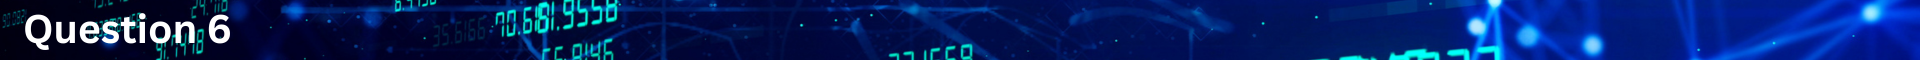
##### 6.	Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

#### Continous Variables : <span style="color: red;">Dollar Loss</span> 

In [1258]:
pd.options.display.float_format = '{:.2f}'.format
caf_2024['Dollar Loss'].describe()

count      36503.00
mean       16648.66
std       191993.12
min            0.00
25%            0.00
50%            0.00
75%         1600.00
max     23615000.00
Name: Dollar Loss, dtype: float64

In [1260]:
caf_2024.describe().T

count     mean       std  min  25%  50%     75%         max
Dollar Loss 36503.00 16648.66 191993.12 0.00 0.00 0.00 1600.00 23615000.00

In [605]:
def mean_loss():
    return caf_2024['Dollar Loss'].mean()

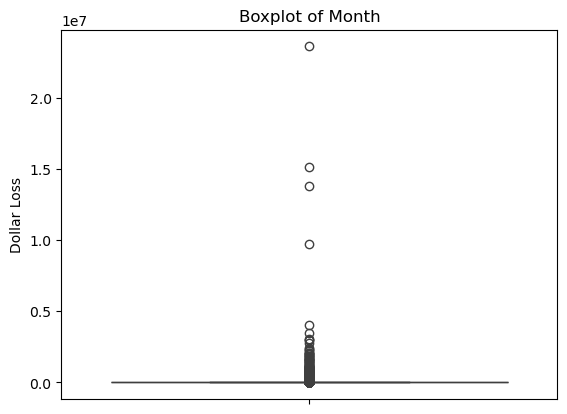

In [1262]:
sns.boxplot(caf_2024['Dollar Loss'])
plt.title(f"Boxplot of {col}")
plt.show()

#### Categorical Variables

In [850]:
caf_2024.select_dtypes("object").describe().T

count unique                       top   freq
Complaint Received Type        36503      2                    Online  20713
Country                        36503      2                    Canada  35925
Province                       36503     13                   Ontario  13679
Fraud and Cybercrime Thematic  36503      5             Service Scams  11360
Solicitation Method            36503      3  Online and Digital Media  15306
Gender                         36503      2                    Female  18764
Language                       36503      3                   English  22475
Age Range                      36503      3                Middle Age  17464
Complaint Type                 36503      2                    Victim  25817
Month                          36503     12                       May   3419

Complaint Received Type
Online    20713
Other     15790
Name: count, dtype: int64


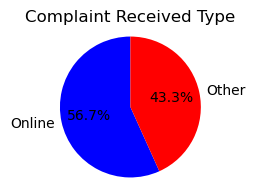

In [1264]:
#Visualization variable: Complaint Received Type
complaint_type = caf_2024['Complaint Received Type'].value_counts()
print(complaint_type)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(complaint_type, labels=complaint_type.index, startangle=90, autopct='%1.1f%%', colors=['blue','red'])
plt.title('Complaint Received Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()

Country
Canada    35925
Other       578
Name: count, dtype: int64


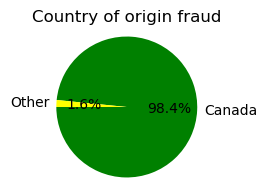

In [1266]:
#Visualization variable: Complaint Received Type
country = caf_2024['Country'].value_counts()
print(country)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(country, labels=country.index, startangle=180, autopct='%1.1f%%', colors=['green','yellow'])
plt.title('Country of origin fraud')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()

Province
Ontario                      13679
Quebec                        7769
British Columbia              5307
Alberta                       4252
Manitoba                      1918
Saskatchewan                  1145
Nova Scotia                    938
New Brunswick                  838
Newfoundland And Labrador      371
Prince Edward Island           156
Yukon                           66
North West Territories          53
Nunavut                         11
Name: count, dtype: int64


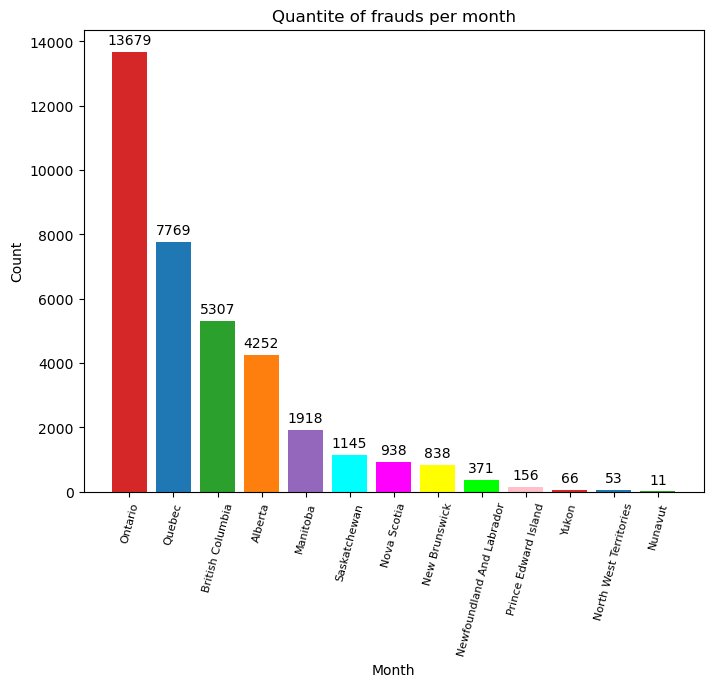

In [1268]:
#Visualization variable: province
province = caf_2024['Province'].value_counts()
print(province)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Define colors (adjust as needed)
bar_colors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 
    'cyan', 'magenta', 'yellow', 'lime', 'pink'
]

# Ensure the number of colors matches the unique table values
bar_colors = bar_colors[:len(province)]

# Create bar chart

bars = ax.bar(province.index , province.values, color=bar_colors)

# Labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_title('Quantite of frauds per month')

# Rotate x-ticks for better readability
plt.xticks(province.index, size=8, rotation=75)

# Add value labels to bars
ax.bar_label(bars, padding=3)

# Show plot
plt.show()

Fraud and Cybercrime Thematic
Service Scams          11360
Financial               9726
Others                  5543
Online Scams            5104
Emergency Extortion     4770
Name: count, dtype: int64


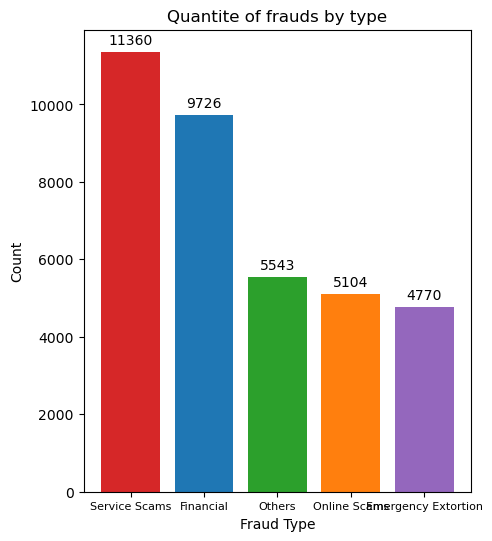

In [858]:
#Visualization variable: Fraud and Cybercrime Thematic

fraud_type_count = caf_2024['Fraud and Cybercrime Thematic'].value_counts()
print(fraud_type_count)

# Create figure and axis
fig, ax = plt.subplots(figsize=(5,6))

# Define colors (adjust as needed)
bar_colors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'cyan']

# Ensure the number of colors matches the unique table values
bar_colors = bar_colors[:len(fraud_type_count)]

# Create bar chart

bars = ax.bar(fraud_type_count.index , fraud_type_count.values, color=bar_colors)

# Labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Fraud Type')
ax.set_title('Quantite of frauds by type')

# Rotate x-ticks for better readability
plt.xticks(fraud_type_count.index, size=8)

# Add value labels to bars
ax.bar_label(bars, padding=3)

# Show plot
plt.show()

Solicitation Method
Online and Digital Media         15306
Phone and Direct Comunication    12076
Others                            9121
Name: count, dtype: int64


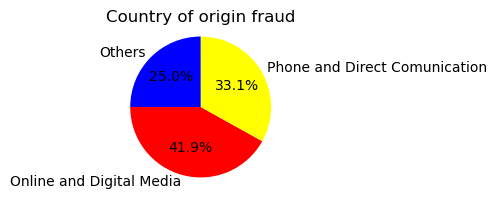

In [860]:
#Visualization variable: Solicitation Method
solicitation = caf_2024['Solicitation Method'].value_counts()
print(solicitation)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(solicitation, labels=solicitation.index, startangle=180, autopct='%1.1f%%', colors=['red','yellow','blue'])
plt.title('Country of origin fraud')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()



Gender
Female    18764
Male      17739
Name: count, dtype: int64


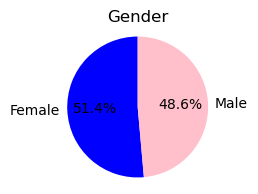

In [1270]:
#Visualization variable: Gender
gender = caf_2024['Gender'].value_counts()
print(gender)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(gender, labels=gender.index, startangle=90, autopct='%1.1f%%', colors=['blue','pink'])
plt.title('Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()


Language
English          22475
Not Available     8399
French            5629
Name: count, dtype: int64


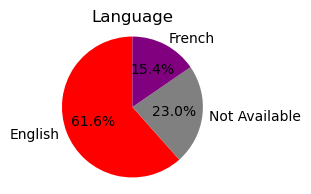

In [1272]:
#Visualization variable: Language
language = caf_2024['Language'].value_counts()
print(language)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(language, labels=language.index, startangle=90, autopct='%1.1f%%', colors=['red','grey','purple'])
plt.title('Language')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()

Age Range
Middle Age    17464
Seniors       13155
Young          5884
Name: count, dtype: int64


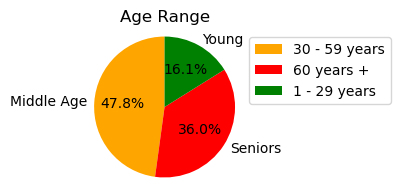

In [1280]:
#Visualization variable: Age Range
age = caf_2024['Age Range'].value_counts()
print(age)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(age, labels=age.index, startangle=90, autopct='%1.1f%%', colors=['orange','red','green'])
plt.title('Age Range')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(['30 - 59 years','60 years +','1 - 29 years'],bbox_to_anchor=(1, 1))
plt.show()

Complaint Type
Victim     25817
Attempt    10686
Name: count, dtype: int64


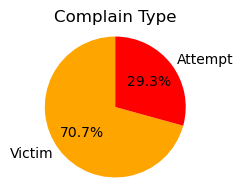

In [1282]:
#Visualization variable: Complaint Type
complain = caf_2024['Complaint Type'].value_counts()
print(complain)

#Create a pie chart
plt.figure(figsize=(2, 2))
plt.pie(complain, labels=complain.index, startangle=90, autopct='%1.1f%%', colors=['orange','red'])
plt.title('Complain Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
#plt.legend(['10% - 15%','16% - 21%','22% more','0% - 9%'],bbox_to_anchor=(1, 1))
plt.show()

Country
Canada    35925
Other       578
Name: count, dtype: int64


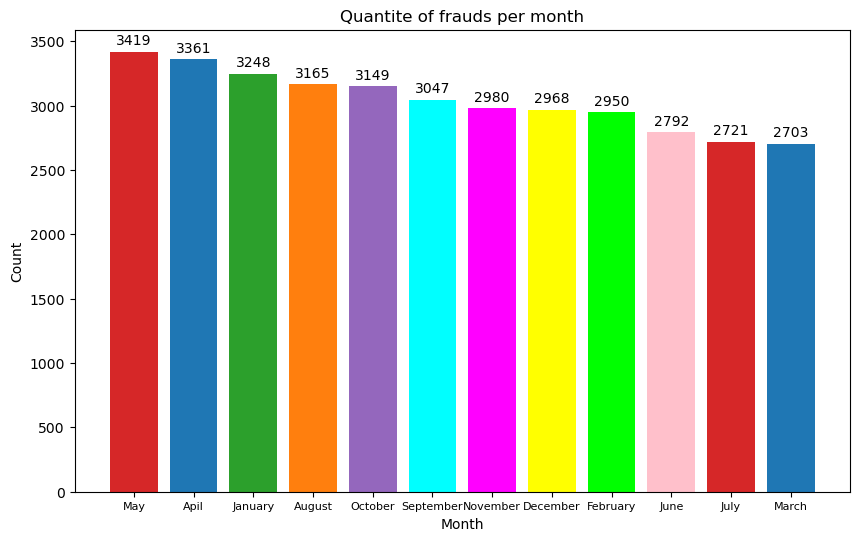

In [872]:
#Visualization variable: Month
month_count = caf_2024['Month'].value_counts()
print(country)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Define colors (adjust as needed)
bar_colors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 
    'cyan', 'magenta', 'yellow', 'lime', 'pink'
]

# Ensure the number of colors matches the unique table values
bar_colors = bar_colors[:len(month_count)]

# Create bar chart

bars = ax.bar(month_count.index , month_count.values, color=bar_colors)

# Labels and title
ax.set_ylabel('Count')
ax.set_xlabel('Month')
ax.set_title('Quantite of frauds per month')

# Rotate x-ticks for better readability
plt.xticks(month_count.index, size=8)

# Add value labels to bars
ax.bar_label(bars, padding=3)

# Show plot
plt.show()

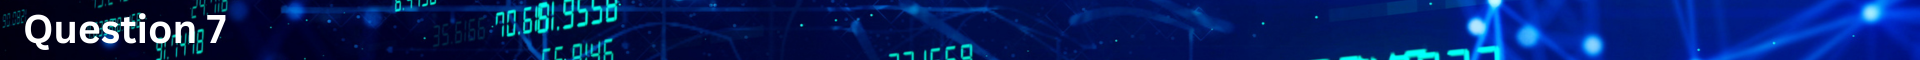
#### 7.	Outlier detection: Use the Local Outlier Factor (LoF) method to identify outliers

The LOF method for outlier detection has the following advantages:
Effective in identifying outliers in datasets with varying densities or clusters.
Doesn’t require assumptions about the underlying distribution of the data.
Provides anomaly scores that can be used to rank the outliers.
Cons of employing the LOF method for outlier detection include the following:

Sensitivity to the choice of parameters such as the number of neighbors (n_neighbors) and the contamination rate (contamination).
Can be computationally expensive for large datasets.
May require careful interpretation and adjustment of the anomaly scores threshold for outlier detection.
Data enthusiasts can identify outliers based on local density deviations and capture anomalies that display different patterns from their neighbors by using the Local Outlier Factor (LOF) method for outlier detection. To get precise outlier detection, however, parameter tuning and careful result interpretation are necessary.

In [1284]:
caf_df = caf_2024.copy()
caf_df.shape

(36503, 11)

In [1286]:
caf_df.shape[0]

36503

In [1288]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor(n_neighbors=360,contamination=0.05)
outliers = lof.fit_predict(caf_df.select_dtypes('float64'))
caf_df.LOF = outliers

outlier_count = (caf_df.LOF == -1).sum()
print(f"Number of outliers: {outlier_count} in a total of {caf_df.shape[0]} observations")
print("-"*100)

# Remove outliers
caf_out = caf_df[caf_df.LOF != -1]
print(f"New dataset without outliers has a total of: {caf_out.shape[0]} observations")

Number of outliers: 1802 in a total of 36503 observations
----------------------------------------------------------------------------------------------------
New dataset without outliers has a total of: 34701 observations


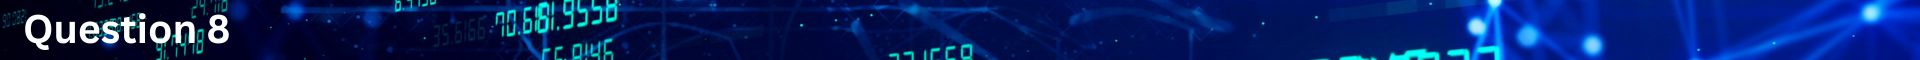
#### 8.	Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:
-	Chi-square test to assess independence between two categorical variables.
-	Correlation analysis to examine relationships between two numeric variables.

##### Chi-square test between Gender and Complaint Type

Chi-square Statistic: 0.6336
p-value: 0.4261
Degrees of Freedom: 1
Result: No significant association (Fail to Reject Null Hypothesis)


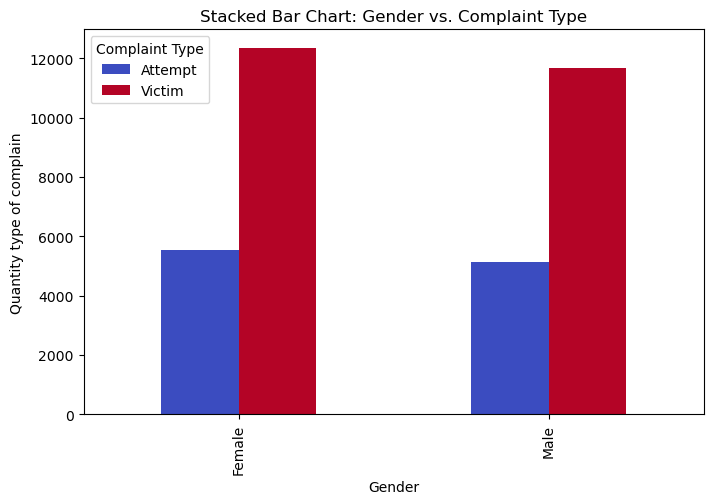

In [1291]:
#Chi-square test to assess independence between two categorical variables.

contingency_table = pd.crosstab(caf_out.Gender, caf_out['Complaint Type'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies Table:")
#print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
if p < 0.05:
    print("Result: Significant association (Reject Null Hypothesis)")
else:
    print("Result: No significant association (Fail to Reject Null Hypothesis)")

#Visualization
contingency_table.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title(f'Stacked Bar Chart: Gender vs. Complaint Type')
plt.xlabel("Gender")
plt.ylabel("Quantity type of complain")
plt.legend(title="Complaint Type")
plt.show()

##### Correlation between Categorical and Numeric Variable (T-test and ANOVA)

In [1293]:
#Function to check normality
def check_normality(df,cat_var, num_var):
    total_normality = 0
    for group in df[cat_var].unique():
        group_p_value = stats.shapiro(df[df[cat_var]==group][[num_var]])[1]
        group_obs_count = df[df[cat_var]==group][[num_var]].count()
        #print(group_obs_count.values)
        if group_p_value > 0.05: 
            print(f"Since p_value {group_p_value} for {group} is greater > 0.05 distributions are normally distributed")
            total_normality +=1 
        else:
            if group_obs_count.values > 30:
                print(f"Since p_value {group_p_value} for {group} is less < 0.05 distributions are NOT normally distributed")
                print("BUT group has more than 30 observations we can assume that it is normally distributed")
            else:
                print(f"Since p_value {group_p_value} for {group} is less < 0.05 distributions are NOT normally distributed")
                print("AND group has less than 30 observations we should join with another group or use another test")              
    return

In [1295]:
check_normality(caf_out,'Gender','Dollar Loss')

Since p_value 9.59667331304556e-117 for Male is less < 0.05 distributions are NOT normally distributed
BUT group has more than 30 observations we can assume that it is normally distributed
Since p_value 1.0497603913823677e-120 for Female is less < 0.05 distributions are NOT normally distributed
BUT group has more than 30 observations we can assume that it is normally distributed


In [1297]:
#check variance between 2 groups
male = caf_out[caf_out['Gender']=='Male']['Dollar Loss']
female = caf_out[caf_out['Gender']=='Female']['Dollar Loss']
pvalue_groups = stats.levene(male,female)[0]
print(f"Since your p-value {pvalue_groups} for equals variance is greater than 0.05, we considere EQUAL group variances")
print("To check if exist some correlation: Pooled t-test - Parametric test")
result = stats.ttest_ind(male, female, equal_var=True)
print(result)  

Since your p-value 70.4456909250106 for equals variance is greater than 0.05, we considere EQUAL group variances
To check if exist some correlation: Pooled t-test - Parametric test
TtestResult(statistic=8.39319313044866, pvalue=4.908060941558316e-17, df=34699.0)


##### Analysis of Variance (ANOVA) to compare means across multiple groups.

In [1300]:
check_normality(caf_out,'Age Range', 'Dollar Loss')

Since p_value 1.301144082115848e-116 for Middle Age is less < 0.05 distributions are NOT normally distributed
BUT group has more than 30 observations we can assume that it is normally distributed
Since p_value 1.5138116516155413e-109 for Seniors is less < 0.05 distributions are NOT normally distributed
BUT group has more than 30 observations we can assume that it is normally distributed
Since p_value 1.4515145253233023e-90 for Young is less < 0.05 distributions are NOT normally distributed
BUT group has more than 30 observations we can assume that it is normally distributed


In [1302]:
#Check Group Variance
#check variance between 3 groups
groups_means = []
for group in caf_out['Age Range'].unique():
    var_group = caf_out[caf_out['Age Range']==group]['Dollar Loss']
    groups_means.append(var_group)


pvalue_groups = stats.levene(*groups_means)
print(f"Since your p-value {pvalue_groups} for equals variance is greater than 0.05, \nwe considere EQUAL group variances")
print("To check if exist some correlation: We run One-way ANOVA - Parametric test")
result = stats.f_oneway(*groups_means)
print(result)  

Since your p-value LeveneResult(statistic=31.53721129245101, pvalue=2.070126406715775e-14) for equals variance is greater than 0.05, 
we considere EQUAL group variances
To check if exist some correlation: We run One-way ANOVA - Parametric test
F_onewayResult(statistic=31.537211292451005, pvalue=2.070126406715775e-14)


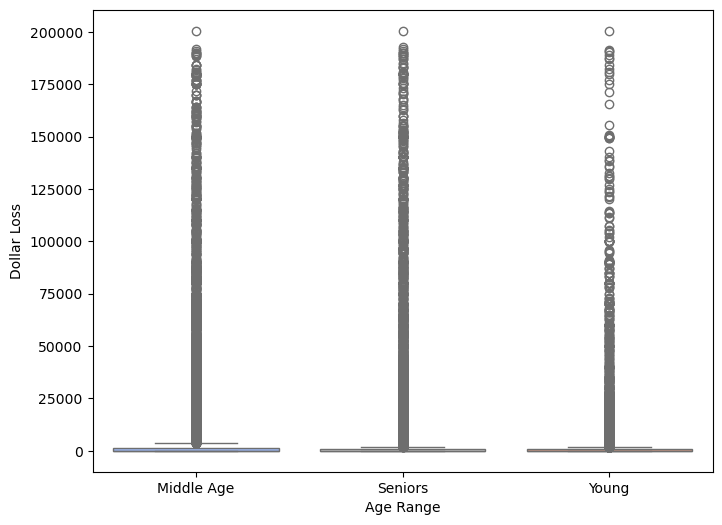

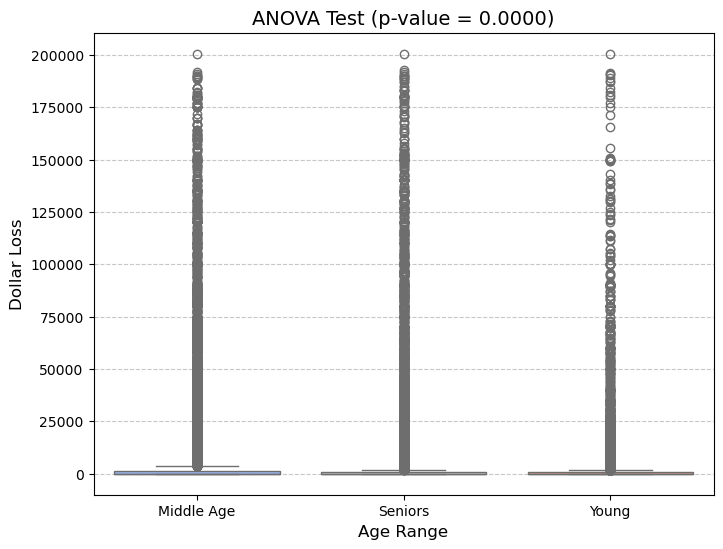

In [1306]:
# Boxplot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age Range', y='Dollar Loss', data=caf_out, palette="coolwarm")

# Title and annotation
plt.title(f"ANOVA Test (p-value = {result.pvalue:.4f})", fontsize=14)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Dollar Loss", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

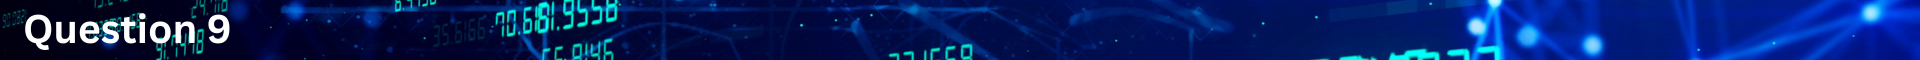
##### 9.	Check for presence of collinearity and multi-collinearity and address it appropriately.

In [1308]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt((stat/(obs*mini)))

In [1310]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt((stat/(obs*mini)))
cat_columns = caf_out.select_dtypes('object').columns
rows= []
for var1 in cat_columns:
  col = []
  for var2 in cat_columns :
    cramers =cramers_V(caf_out[var1], caf_out[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
caf_cramers = pd.DataFrame(cramers_results, columns = cat_columns, index =cat_columns)
caf_cramers

Complaint Received Type  Country  Province  \
Complaint Received Type                           1.00     0.07      0.20   
Country                                           0.07     1.00      0.03   
Province                                          0.20     0.03      1.00   
Fraud and Cybercrime Thematic                     0.12     0.03      0.04   
Solicitation Method                               0.10     0.04      0.04   
Gender                                            0.06     0.02      0.02   
Language                                          0.37     0.06      0.48   
Age Range                                         0.15     0.04      0.04   
Complaint Type                                    0.06     0.00      0.06   
Month                                             0.10     0.03      0.03   

                               Fraud and Cybercrime Thematic  \
Complaint Received Type                                 0.12   
Country                                                 0.03   
Province                                                0.04   
Fraud and Cybercrime Thematic                           1.00   
Solicitation Method                                     0.30   
Gender                                                  0.05   
Language                                                0.09   
Age Range                                               0.08   
Complaint Type                                          0.33   
Month                                                   0.04   

                               Solicitation Method  Gender  Language  \
Complaint Received Type                       0.10    0.06      0.37   
Country                                       0.04    0.02      0.06   
Province                                      0.04    0.02      0.48   
Fraud and Cybercrime Thematic                 0.30    0.05      0.09   
Solicitation Method                           1.00    0.03      0.07   
Gender                                        0.03    1.00      0.01   
Language                                      0.07    0.01      1.00   
Age Range                                     0.07    0.03      0.03   
Complaint Type                                0.24    0.00      0.04   
Month                                         0.05    0.03      0.04   

                               Age Range  Complaint Type  Month  
Complaint Received Type             0.15            0.06   0.10  
Country                             0.04            0.00   0.03  
Province                            0.04            0.06   0.03  
Fraud and Cybercrime Thematic       0.08            0.33   0.04  
Solicitation Method                 0.07            0.24   0.05  
Gender                              0.03            0.00   0.03  
Language                            0.03            0.04   0.04  
Age Range                           1.00            0.07   0.03  
Complaint Type                      0.07            1.00   0.05  
Month                               0.03            0.05   1.00

##### Interpretation:
 - 0 = No association
 - greater 0.5 = Strong association
 - 1 = Perfect association

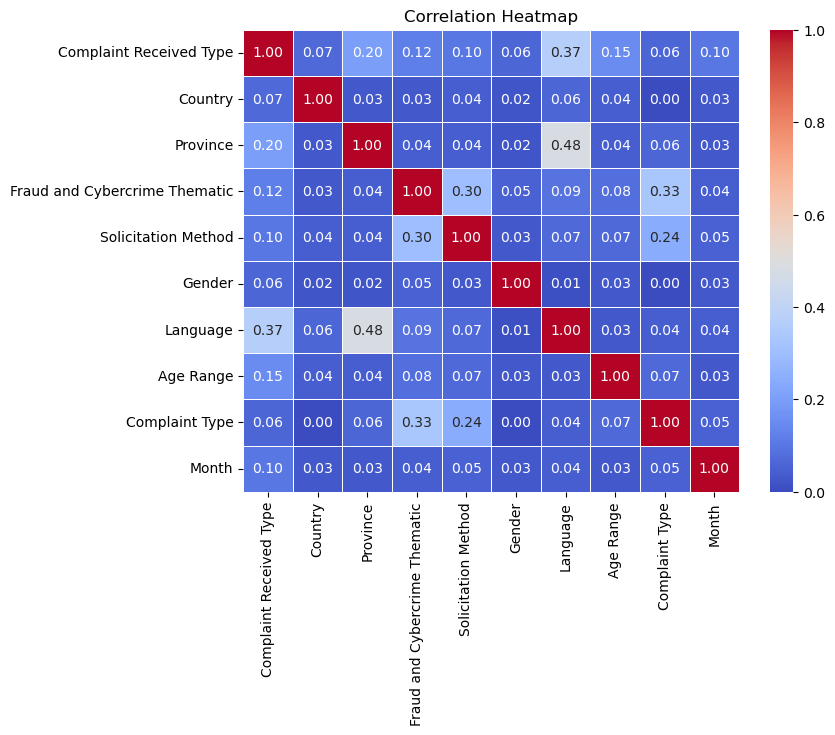

In [1312]:
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(caf_cramers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [1315]:
caf_colli = caf_out.copy()
caf_colli.head()

Complaint Received Type Country Province Fraud and Cybercrime Thematic  \
264682                  Online  Canada  Ontario                  Online Scams   
264683                  Online  Canada  Ontario                     Financial   
264684                  Online  Canada  Ontario                  Online Scams   
264685                  Online  Canada  Ontario                     Financial   
264686                  Online  Canada  Ontario                  Online Scams   

                  Solicitation Method Gender       Language   Age Range  \
264682       Online and Digital Media   Male  Not Available  Middle Age   
264683                         Others   Male  Not Available  Middle Age   
264684  Phone and Direct Comunication   Male  Not Available  Middle Age   
264685       Online and Digital Media   Male        English  Middle Age   
264686  Phone and Direct Comunication   Male        English  Middle Age   

       Complaint Type  Dollar Loss    Month  
264682        Attempt         0.00  January  
264683        Attempt         0.00  January  
264684        Attempt         0.00  January  
264685         Victim     60000.00  January  
264686        Attempt         0.00  January

In [1334]:
# caf_colli['Complaint Type'] = caf_colli['Complaint Type'].map({'Attempt': 0, 'Victim': 1})

# encoder = LabelEncoder()
# for col in caf_colli.select_dtypes('object') :
#     caf_colli[col] = encoder.fit_transform(caf_colli[col])

# caf_colli = pd.get_dummies(caf_colli,columns=cat_columns, drop_first=True)
# caf_colli.head()


In [1319]:
def check_collinearity(df,treshold = 0.8):
    pairs = pd.DataFrame(columns=['feature1', 'feature2', 'value'])
    corr_matrix = df.corr(numeric_only=True)  # Compute the correlation matrix
    np.fill_diagonal(corr_matrix.values, 0) # Set diagonal to 0
    #corr_matrix
    #corr_matrix.values
    #Create a list of correlated pairs above the threshold
    corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) for x, y in zip(*np.where(abs(np.tril(corr_matrix)) > treshold))]
    # DataFrame of pairs with high correlation
    if corr:
        #print(corr)
        pairs = pd.DataFrame(corr, columns=['feature1', 'feature2', 'value'])
        return pairs
    else:
        result = "No collinearity found between variables, for treshold ="+ str(treshold)
        return result

In [1321]:
check_collinearity(caf_cramers)

'No collinearity found between variables, for treshold =0.8'

In [1323]:
def check_max_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.select_dtypes(include=[np.number]).columns
    vif['VIF'] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).values, i) for i in range(df.select_dtypes(include=[np.number]).shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    #print(vif.to_string())
    max_vif_value = vif.head(1)
    return max_vif_value

check_max_vif(caf_cramers)

Features  VIF
6  Language 3.72

If any VIF greater than 10 suggests significant multicollinearity. This means some variable might be highly correlated with other independent variables in the model, potentially causing instability in the regression coefficients. 
Since max VIF is 3.72 we dont't need drop any variable. 

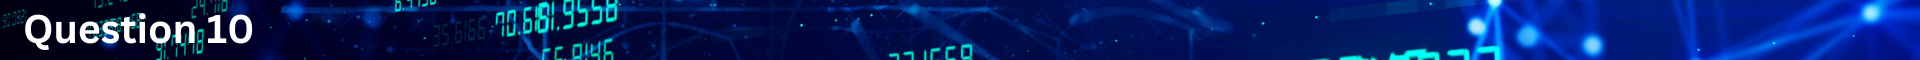
##### 10.	Encode the data if required (if there are categorical independent variables).

In [1336]:
cat_columns

Index(['Complaint Received Type', 'Country', 'Province',
       'Fraud and Cybercrime Thematic', 'Solicitation Method', 'Gender',
       'Language', 'Age Range', 'Complaint Type', 'Month'],
      dtype='object')

In [1338]:
caf_out.columns

Index(['Complaint Received Type', 'Country', 'Province',
       'Fraud and Cybercrime Thematic', 'Solicitation Method', 'Gender',
       'Language', 'Age Range', 'Complaint Type', 'Dollar Loss', 'Month'],
      dtype='object')

In [1340]:
caf_encode = caf_out.copy()
caf_encode.shape

(34701, 11)

In [1342]:
caf_encode.head()

Complaint Received Type Country Province Fraud and Cybercrime Thematic  \
264682                  Online  Canada  Ontario                  Online Scams   
264683                  Online  Canada  Ontario                     Financial   
264684                  Online  Canada  Ontario                  Online Scams   
264685                  Online  Canada  Ontario                     Financial   
264686                  Online  Canada  Ontario                  Online Scams   

                  Solicitation Method Gender       Language   Age Range  \
264682       Online and Digital Media   Male  Not Available  Middle Age   
264683                         Others   Male  Not Available  Middle Age   
264684  Phone and Direct Comunication   Male  Not Available  Middle Age   
264685       Online and Digital Media   Male        English  Middle Age   
264686  Phone and Direct Comunication   Male        English  Middle Age   

       Complaint Type  Dollar Loss    Month  
264682        Attempt         0.00  January  
264683        Attempt         0.00  January  
264684        Attempt         0.00  January  
264685         Victim     60000.00  January  
264686        Attempt         0.00  January

In [1344]:
#Enconde my binary variable
caf_encode['Complaint Type'] = caf_encode['Complaint Type'].map({'Attempt': 0, 'Victim': 1})

X = caf_encode.drop(columns='Complaint Type', axis=1)
y = caf_encode['Complaint Type']

encoder = LabelEncoder()
for col in X.select_dtypes('object').columns:
    X[col] = encoder.fit_transform(X[col])

X = pd.get_dummies(X,columns=X.select_dtypes('object').columns, drop_first=True)
X.head()

#Setup independent and dependent variables


Complaint Received Type  Country  Province  \
264682                        0        0         8   
264683                        0        0         8   
264684                        0        0         8   
264685                        0        0         8   
264686                        0        0         8   

        Fraud and Cybercrime Thematic  Solicitation Method  Gender  Language  \
264682                              2                    0       1         2   
264683                              1                    1       1         2   
264684                              2                    2       1         2   
264685                              1                    0       1         0   
264686                              2                    2       1         0   

        Age Range  Dollar Loss  Month  
264682          0         0.00      4  
264683          0         0.00      4  
264684          0         0.00      4  
264685          0     60000.00      4  
264686          0         0.00      4

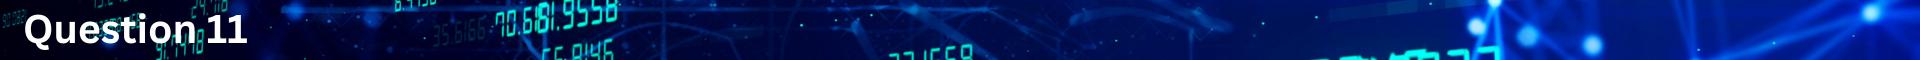
##### 11.	Split the dataset into training and testing subsets

In [1346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27760, 10), (6941, 10), (27760,), (6941,))

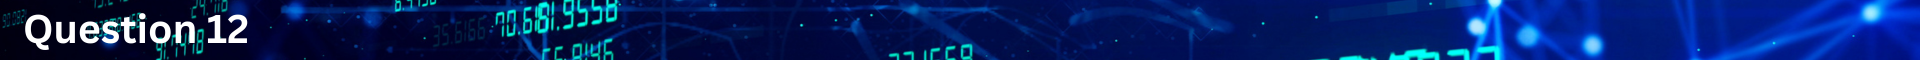
##### 12.	Scale the training data and use the same scaler to also scale the test data.

In [1349]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training set
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) # It is better for visualization
X_test_scaled = scaler.transform(X_test)  # NEVER fit test dataset
print(X_train_scaled)
print(X_test_scaled)

[[-0.89105387 -0.12676051  0.50158634 ...  0.42817816 -0.32148519
   0.15283453]
 [ 1.12226661 -0.12676051  1.02358439 ...  1.78769158 -0.32148519
   0.15283453]
 [ 1.12226661 -0.12676051  1.02358439 ... -0.93133525 -0.32148519
   0.15283453]
 ...
 [-0.89105387 -0.12676051  0.50158634 ... -0.93133525  0.2066265
  -0.70030974]
 [-0.89105387 -0.12676051  0.50158634 ... -0.93133525 -0.32148519
   0.72159737]
 [ 1.12226661 -0.12676051  0.50158634 ... -0.93133525 -0.32148519
  -0.98469117]]
[[ 1.12226661 -0.12676051  1.02358439 ... -0.93133525 -0.32148519
  -0.1315469 ]
 [-0.89105387 -0.12676051  0.50158634 ... -0.93133525  3.06724204
   0.72159737]
 [-0.89105387 -0.12676051  1.02358439 ...  0.42817816  0.29464512
   1.0059788 ]
 ...
 [ 1.12226661 -0.12676051  1.02358439 ...  0.42817816 -0.32148519
   1.29036022]
 [-0.89105387 -0.12676051 -1.58640584 ... -0.93133525 -0.31837593
  -0.98469117]
 [ 1.12226661 -0.12676051  0.50158634 ...  0.42817816 -0.32148519
   0.15283453]]


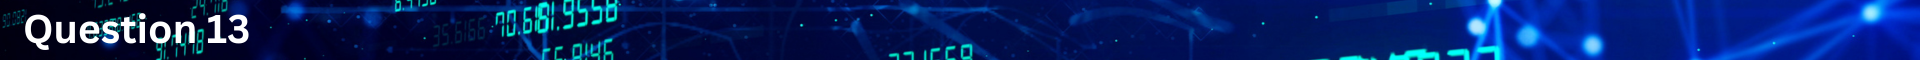
#### 13.	Perform PCA. Based on outcome, recommend if Principal Components would be useful for data preparation or not. 

Number of components explaining 95% variance: 1


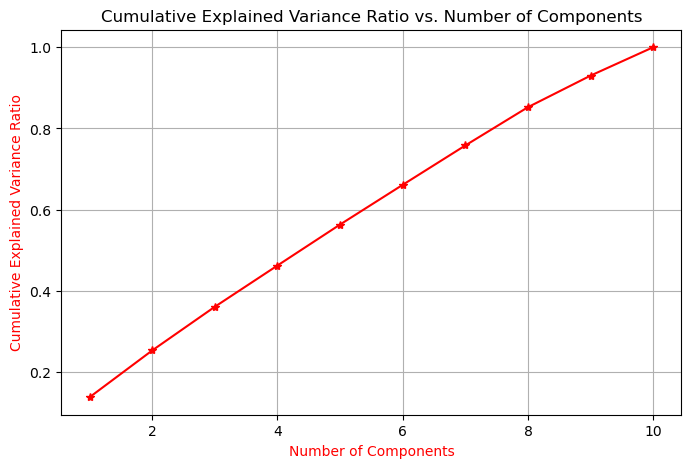

PCA reduces dimensionality significantly while preserving variance, so it can be useful for this dataset.


0     1     2     3     4     5     6     7     8     9
0 -1.05  1.97 -0.42  0.95 -0.12 -0.82 -0.89 -0.32 -0.35 -0.08
1  0.31  1.52  0.43  0.77  2.29  0.50 -0.56  0.48 -0.01  0.56
2 -0.11  0.33  1.49  0.00 -0.03  1.57 -0.01  0.12 -1.18  0.53
3  1.08  0.34 -0.07  0.69  1.19  1.31 -0.06 -0.01  0.68  0.17
4 -3.16 -3.12  0.43 -0.34 -0.16  0.51 -0.74  0.47  1.52  0.96

In [1352]:
# from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_scaled)
caf_pca = pd.DataFrame(pca_result)

# Determine how many components explain at least 95% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Number of components explaining 95% variance: {num_components}')

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1),cumulative_variance_ratio, marker='*', color='red')
plt.xlabel('Number of Components', color='red')
plt.ylabel('Cumulative Explained Variance Ratio',color='red')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# for i, ratio in enumerate(explained_variance_ratio[:5]):
#     print(f"PC{i+1} explained variance ratio: {ratio:.4f}")

# Recommendation based on PCA outcome
if num_components < X_train_scaled.shape[1] * 0.8:
    print("PCA reduces dimensionality significantly while preserving variance, so it can be useful for this dataset.")
else:
    print("PCA does not provide significant dimensionality reduction. Using original features might be preferable.")

caf_pca.head()

In [1354]:
caf_pca.head()

0     1     2     3     4     5     6     7     8     9
0 -1.05  1.97 -0.42  0.95 -0.12 -0.82 -0.89 -0.32 -0.35 -0.08
1  0.31  1.52  0.43  0.77  2.29  0.50 -0.56  0.48 -0.01  0.56
2 -0.11  0.33  1.49  0.00 -0.03  1.57 -0.01  0.12 -1.18  0.53
3  1.08  0.34 -0.07  0.69  1.19  1.31 -0.06 -0.01  0.68  0.17
4 -3.16 -3.12  0.43 -0.34 -0.16  0.51 -0.74  0.47  1.52  0.96

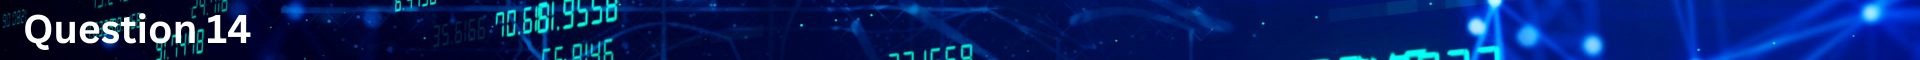
#### 14 -	Classification: Build models based on atleast 3 different algorithms
- i.	Logistic Regression / DecisionTreeClassifier / LDA: Choose any one of these 3. 
- ii.	KNN, SVM, RandomForest, AdaBoost, XGBoost: For models other than KNN, tune atleast 3 hyperparameters using GridSearchCV.


##### Logistic Regression

In [1356]:
# Target: Complaint Type (Categorical - Multi class)
#Logisctic regression

model = LogisticRegression(multi_class='ovr')#model = LogisticRegression(max_iter=500, tol=0.001)


def model_analysis(name, model, X_train, X_test, y_train, y_test, folds, regularization="N/A", class_weight="N/A", c="N/A"):
    
    #train model
    model.fit(X_train,y_train)
    
    #predict on test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    

    #Checking accuracy score (Train and Test)
    acu_score_train = accuracy_score(y_train,y_pred_train)
    acu_score_test = accuracy_score(y_test,y_pred_test)

    #Checking f1_score (Train and test)
    train_f1_score =round(metrics.f1_score(y_train,y_pred_train),2)
    test_f1_score =round(metrics.f1_score(y_test,y_pred_test),2) 

    # print classification report
    print(name)
    print("_"*60)
    print("Classification Report")
    print(classification_report(y_test, y_pred_test))
    print("_"*60)

    #k-fold cross-validation
    cros_roc_auc=cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1,scoring='roc_auc').mean()
    cross_acc_mean=cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1).mean()
    cross_scores_f1 = cross_val_score(model,X_train,y_train,cv=folds, n_jobs=-1,scoring='f1')
    cross_mean_f1 = cross_scores_f1.mean()

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test,y_pred_test)
    categories = ['Negative','Positive']
    group_names = ['TN','FP', 'FN','TP']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}: {v2}\n\n{v3}' for v1, v2,v3 in zip(group_names,cf_matrix.flatten(),group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()
    print("="*100)
    
    # print("model",model)
    # print("X_train",X_train)
    # print("y_train",y_train)
    # print("cross_scores_f1",cross_scores_f1)
    # print("cross_mean_f1",cross_mean_f1)

    # Create the ROC Curve plot
    fig, ax = plt.subplots(figsize=(8, 6))
    # Plot ROC curve for test data
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name="Test ROC")
    # Plot ROC curve for train data
    RocCurveDisplay.from_estimator(model, X_train, y_train, ax=ax, name="Train ROC")
    # Show the plot
    plt.title("ROC Curve - Train vs. Test")
    plt.show()
    
    data_entry = {'Model': [name],
         'Regularization' : [regularization],
         'C':[c],
         'Class_weight' : [class_weight],
         'AUC':[cros_roc_auc],  
         'train_accuracy_score': [acu_score_train],
         'test_accuracy_score': [acu_score_test],
         'train_f1_score': [train_f1_score],
         'test_f1_score': [test_f1_score],
         'CrossVal_Mean(Accuracy)': [cross_acc_mean],  
         'CrossVal_Mean(F1_score)': [cross_mean_f1],
         'CrossVal1(f1)': [cross_scores_f1[0]],
         'CrossVal2(f1)': [cross_scores_f1[1]],
         'CrossVal3(f1)': [cross_scores_f1[2]],
         'CrossVal4(f1)': [cross_scores_f1[3]],
         'CrossVal5(f1)': [cross_scores_f1[4]],
          }
    model_result = pd.DataFrame(data_entry)
    return model_result  
    

Logistic Regression
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.32      0.43      2194
           1       0.74      0.92      0.82      4747

    accuracy                           0.73      6941
   macro avg       0.69      0.62      0.62      6941
weighted avg       0.71      0.73      0.70      6941

____________________________________________________________


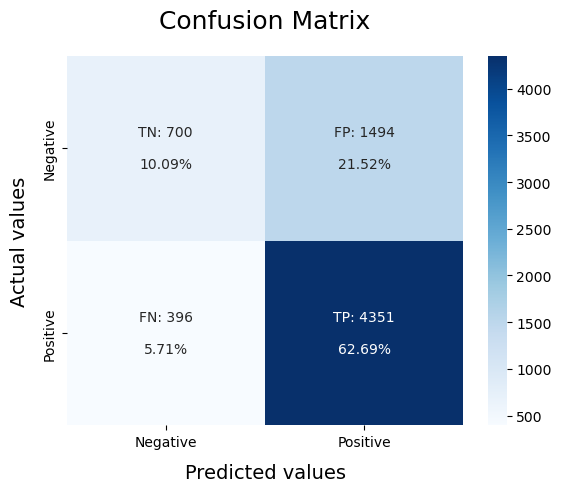

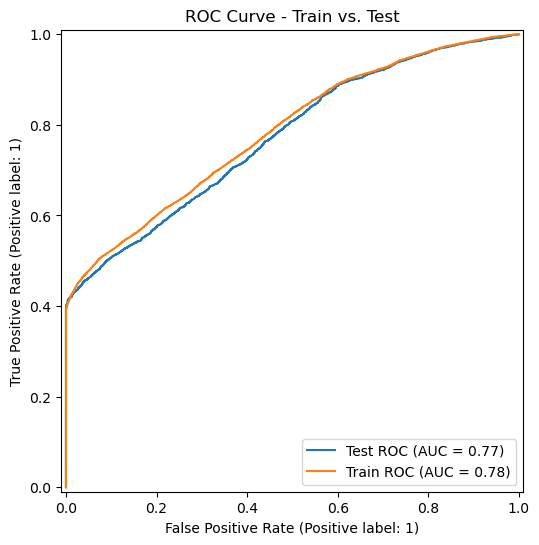

Model Regularization    C Class_weight  AUC  \
0  Logistic Regression             L2  N/A          N/A 0.78   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82

In [1368]:
#model_analysis(name, model, X_train, X_test, y_train, y_test, folds, regularization="N/A", Class_weight="N/A", c="N/A"):
model = LogisticRegression(max_iter=1000,random_state=1234)
result_model = model_analysis("Logistic Regression", model, X_train_scaled, X_test_scaled, y_train, y_test,5,"L2" )
result_model
model_check=result_model.copy()
model_check

##### Decision Tree

Decision Tree Classifier
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2194
           1       0.85      0.81      0.83      4747

    accuracy                           0.77      6941
   macro avg       0.73      0.74      0.74      6941
weighted avg       0.77      0.77      0.77      6941

____________________________________________________________


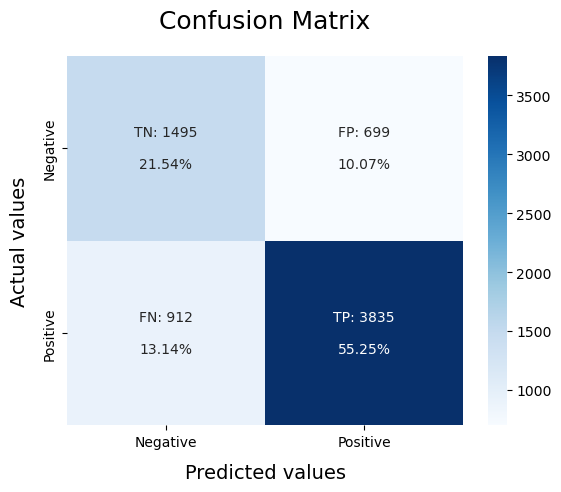

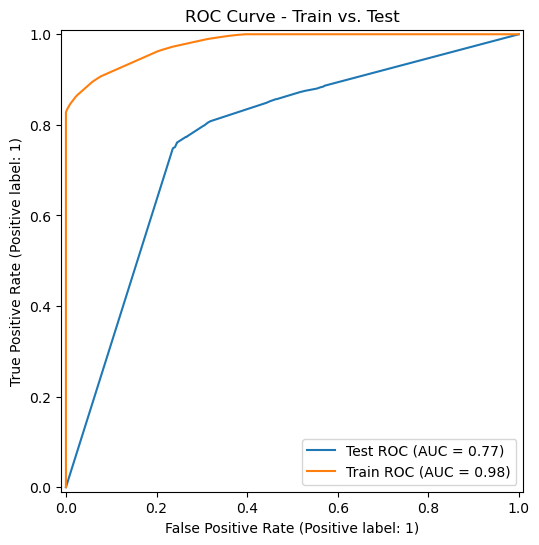

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83

In [1370]:
model_dtc = DecisionTreeClassifier(random_state=1234) 
result_model = model_analysis("Decision Tree Classifier", model_dtc, X_train_scaled, X_test_scaled, y_train, y_test,5)
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check 

##### Random Forest

Random Forest Classifier
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2194
           1       0.84      0.83      0.83      4747

    accuracy                           0.78      6941
   macro avg       0.74      0.74      0.74      6941
weighted avg       0.78      0.78      0.78      6941

____________________________________________________________


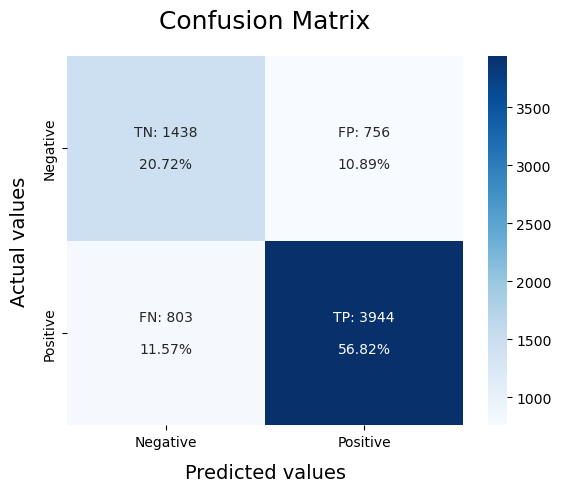

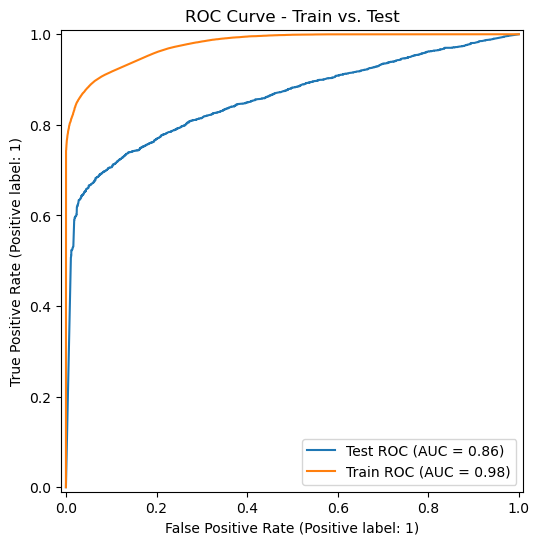

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84

In [1372]:
RF1=RandomForestClassifier(random_state=1234, n_jobs = -1)
result_model = model_analysis("Random Forest Classifier", RF1, X_train_scaled, X_test_scaled, y_train, y_test,5)
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check 

##### XGBoost

XGB Classifier
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.45      0.56      2194
           1       0.78      0.93      0.85      4747

    accuracy                           0.77      6941
   macro avg       0.76      0.69      0.70      6941
weighted avg       0.77      0.77      0.76      6941

____________________________________________________________


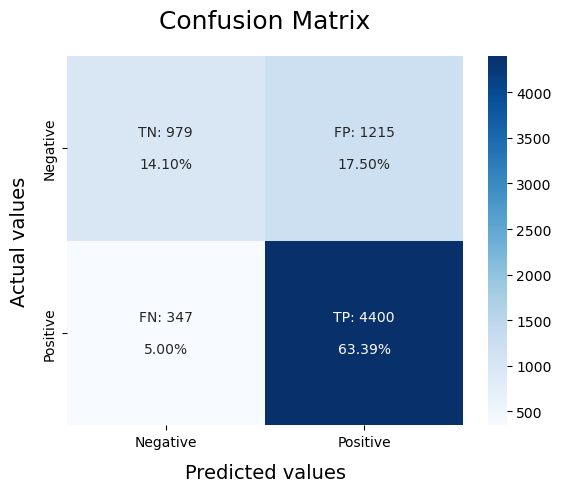

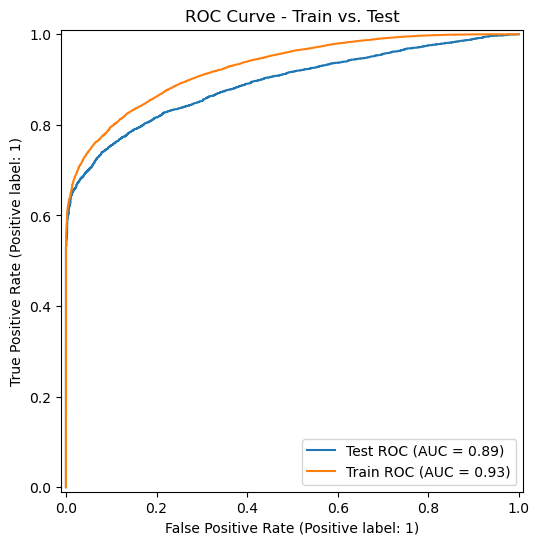

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   
3            XGB Classifier            N/A  N/A          N/A 0.89   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   
3                  0.83                 0.77            0.88           0.85   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   
3                     0.78                     0.85           0.85   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84  
3           0.85           0.85           0.85           0.85

In [1373]:
XGB = xgboost.XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=100, seed=8, scale_pos_weight=2, n_jobs= -1)
result_model = model_analysis("XGB Classifier", XGB, X_train_scaled, X_test_scaled, y_train, y_test, 5)
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check

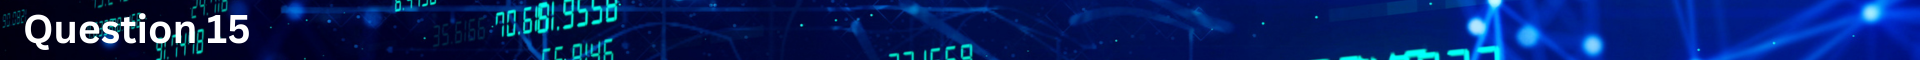
##### 15.	Check for overfitting and take steps to address it

In [1374]:
'''To check for overfitting, we can analyze the model_check dataset and compare the model's performance on the training and test sets. 
If the model performs significantly better on the training data than on the test data, it may indicate overfitting, meaning the model has 
learned patterns specific to the training data that do not generalize well to unseen data.''' 

model_check

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   
3            XGB Classifier            N/A  N/A          N/A 0.89   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   
3                  0.83                 0.77            0.88           0.85   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   
3                     0.78                     0.85           0.85   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84  
3           0.85           0.85           0.85           0.85

###### Tunning models to trying get better results

LR - Balanced
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      2194
           1       0.89      0.54      0.67      4747

    accuracy                           0.64      6941
   macro avg       0.68      0.70      0.64      6941
weighted avg       0.76      0.64      0.65      6941

____________________________________________________________


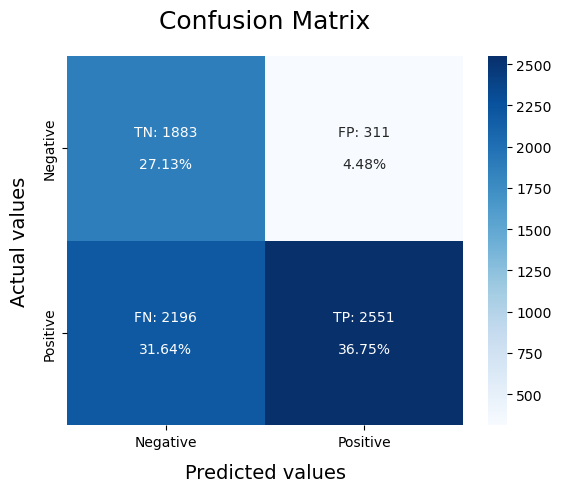

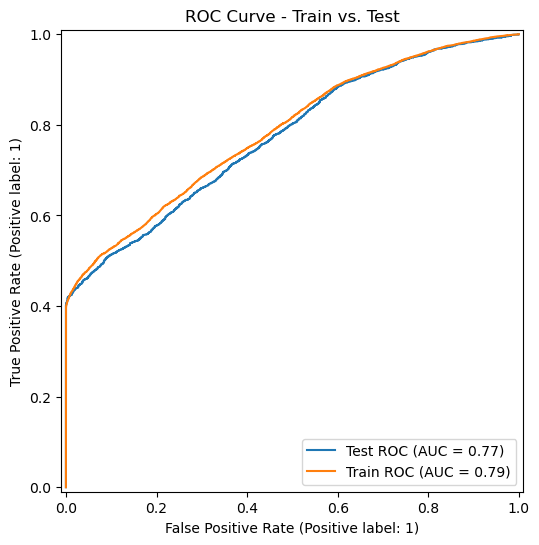

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   
3            XGB Classifier            N/A  N/A          N/A 0.89   
4             LR - Balanced             L2  N/A     balanced 0.78   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   
3                  0.83                 0.77            0.88           0.85   
4                  0.65                 0.64            0.68           0.67   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   
3                     0.78                     0.85           0.85   
4                     0.64                     0.68           0.68   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84  
3           0.85           0.85           0.85           0.85  
4           0.68           0.68           0.69           0.68

In [1379]:
#Logistic Regression - Set class_weight
model = LogisticRegression(solver='liblinear' ,class_weight='balanced',random_state=1234)
result_model = model_analysis("LR - Balanced", model, X_train_scaled, X_test_scaled, y_train, y_test,5,"L2",class_weight='balanced')
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check

Decision Tree Classifier
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2194
           1       0.85      0.81      0.83      4747

    accuracy                           0.77      6941
   macro avg       0.73      0.74      0.74      6941
weighted avg       0.77      0.77      0.77      6941

____________________________________________________________


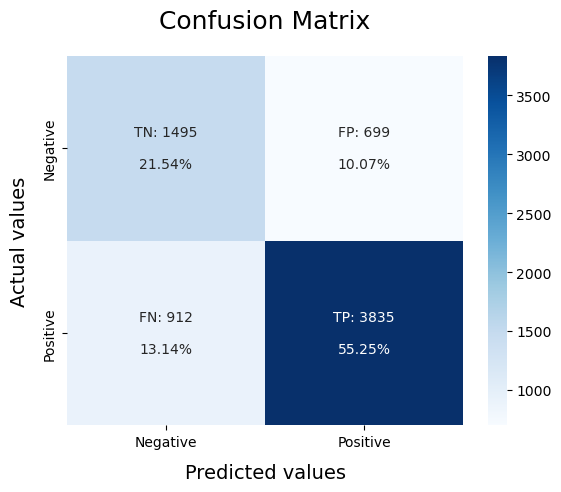

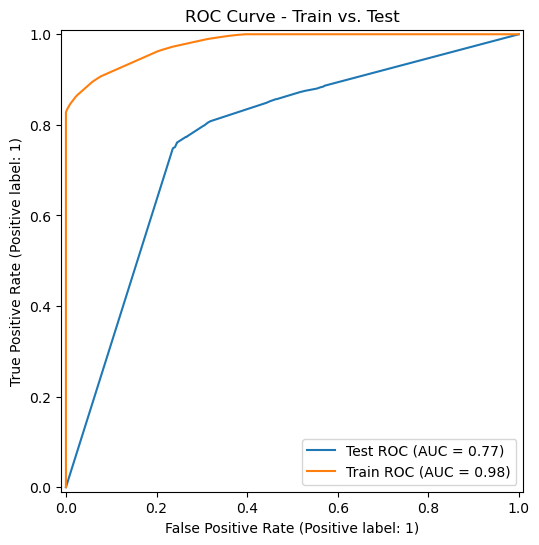

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   
3            XGB Classifier            N/A  N/A          N/A 0.89   
4             LR - Balanced             L2  N/A     balanced 0.78   
5  Decision Tree Classifier            N/A  N/A          N/A 0.76   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   
3                  0.83                 0.77            0.88           0.85   
4                  0.65                 0.64            0.68           0.67   
5                  0.91                 0.77            0.93           0.83   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   
3                     0.78                     0.85           0.85   
4                     0.64                     0.68           0.68   
5                     0.76                     0.83           0.83   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84  
3           0.85           0.85           0.85           0.85  
4           0.68           0.68           0.69           0.68  
5           0.82           0.82           0.83           0.83

In [1381]:
# Decision Tree with 
model_dtc = DecisionTreeClassifier(random_state=1234) 
result_model = model_analysis("Decision Tree Classifier", model_dtc, X_train_scaled, X_test_scaled, y_train, y_test,5)
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check 

GridSearchCV
____________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2194
           1       0.87      0.85      0.86      4747

    accuracy                           0.81      6941
   macro avg       0.78      0.79      0.79      6941
weighted avg       0.82      0.81      0.81      6941

____________________________________________________________


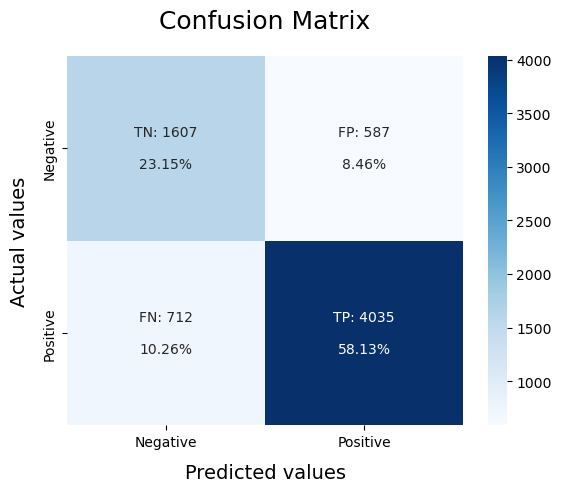

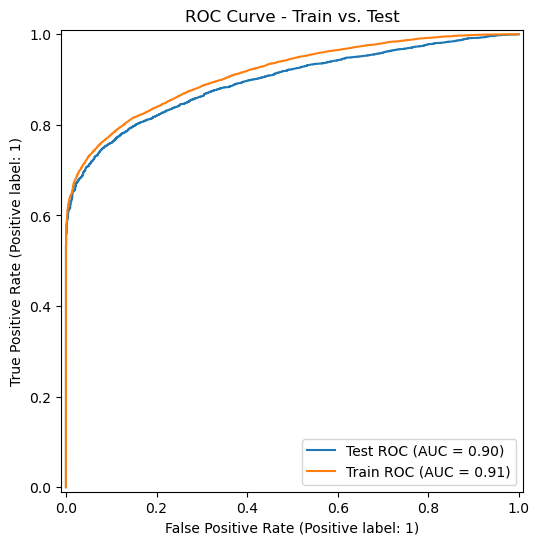

Model Regularization    C Class_weight  AUC  \
0       Logistic Regression             L2  N/A          N/A 0.78   
1  Decision Tree Classifier            N/A  N/A          N/A 0.76   
2  Random Forest Classifier            N/A  N/A          N/A 0.86   
3            XGB Classifier            N/A  N/A          N/A 0.89   
4             LR - Balanced             L2  N/A     balanced 0.78   
5  Decision Tree Classifier            N/A  N/A          N/A 0.76   
6              GridSearchCV            N/A  N/A          N/A 0.90   

   train_accuracy_score  test_accuracy_score  train_f1_score  test_f1_score  \
0                  0.74                 0.73            0.83           0.82   
1                  0.91                 0.77            0.93           0.83   
2                  0.91                 0.78            0.94           0.83   
3                  0.83                 0.77            0.88           0.85   
4                  0.65                 0.64            0.68           0.67   
5                  0.91                 0.77            0.93           0.83   
6                  0.83                 0.81            0.87           0.86   

   CrossVal_Mean(Accuracy)  CrossVal_Mean(F1_score)  CrossVal1(f1)  \
0                     0.73                     0.83           0.83   
1                     0.76                     0.83           0.83   
2                     0.78                     0.84           0.84   
3                     0.78                     0.85           0.85   
4                     0.64                     0.68           0.68   
5                     0.76                     0.83           0.83   
6                     0.81                     0.86           0.86   

   CrossVal2(f1)  CrossVal3(f1)  CrossVal4(f1)  CrossVal5(f1)  
0           0.83           0.84           0.82           0.82  
1           0.82           0.82           0.83           0.83  
2           0.84           0.84           0.84           0.84  
3           0.85           0.85           0.85           0.85  
4           0.68           0.68           0.69           0.68  
5           0.82           0.82           0.83           0.83  
6           0.86           0.86           0.86           0.87

In [1383]:
# RandomForest with 3 hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
RF3_hyper  = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
result_model = model_analysis("GridSearchCV", RF3_hyper, X_train_scaled, X_test_scaled, y_train, y_test,5)
model_check = pd.concat([model_check, result_model], ignore_index=True)
model_check 

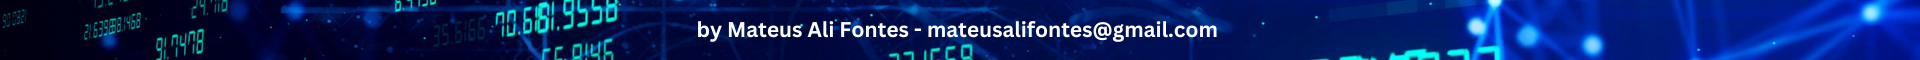